In [1]:
# !git clone https://github.com/RockatanskyV8/deep-learning.git
%cd deep-learning

/content/deep-learning


In [2]:
!git pull

Already up to date.


In [3]:
import pandas as pd
import numpy as np
import torch.optim as optim

from Plots  import *
from Modelos  import *

from Treinamento import Treinamento

In [4]:
def plots(model, train_loss, valid_loss, X_test, y_test):
  p = Plots()
  p.plot_losses(train_loss, valid_loss)

  accuracy_final = p.get_accuracy(model, X_test, y_test)
  print("\n############ Acurácia ############")
  print(accuracy_final)
  print("############ -------- ############")


In [5]:
class Classificador():
    def __init__(self, dataset, model, epochs = 2000, batch_size = 25, early_stopping_epochs = 60):
        self.dataset               = dataset
        self.model                 = model
        self.epochs                = epochs
        self.early_stopping_epochs = early_stopping_epochs
        self.batch_size            = batch_size

    def classificacao(self, optimizer, criterion):
        t = Treinamento(self.dataset, self.epochs, self.batch_size, self.early_stopping_epochs)
        model, train_loss, valid_loss = t.train_linear(self.model, optimizer, criterion)

        return model, train_loss, valid_loss, t.train, t.valid


In [6]:
def run_models(dataset, model, optimizer, criterion,
               run_epochs = 2000, 
               run_batch_size = 25, 
               run_early_stopping_epochs = 60):
  
  runner = Classificador(dataset, model, 
                         epochs = run_epochs, 
                         batch_size = run_batch_size, 
                         early_stopping_epochs = run_early_stopping_epochs)
  
  return runner.classificacao(optimizer, criterion)

# Leitura de dados

In [7]:
df = pd.read_csv('df_points.txt', sep='\t', index_col=[0])

# Classificação

## Tentativa 1

In [ ]:
input_features = 3
output_size = 2
p = 0.5

model1 = GeradorRede(input_features , [Camada(500, nn.ReLU(), nn.Dropout(p) ),
                                       Camada(250, nn.ReLU(), nn.Dropout(p) ),
                                       Camada(100, nn.ReLU(), nn.Dropout(p) ),
                                       Camada( 10, nn.ReLU()),
                                       Camada(  2, nn.Softmax(dim=-1) ),
                                       ])
print(model1)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=100, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)

epochs = 2000
batch_size = 25
early_stopping_epochs = 50 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model1, epochs, batch_size, early_stopping_epochs)
model1, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 18%|█▊        | 360/2000 [03:31<16:03,  1.70it/s]

Training interrupted by early stopping!
Total epochs run: 361
Best model found at epoch 310 with valid loss 31.046983540058136 and training loss 151.77934661507607
Total training time: 0:03:31.571033


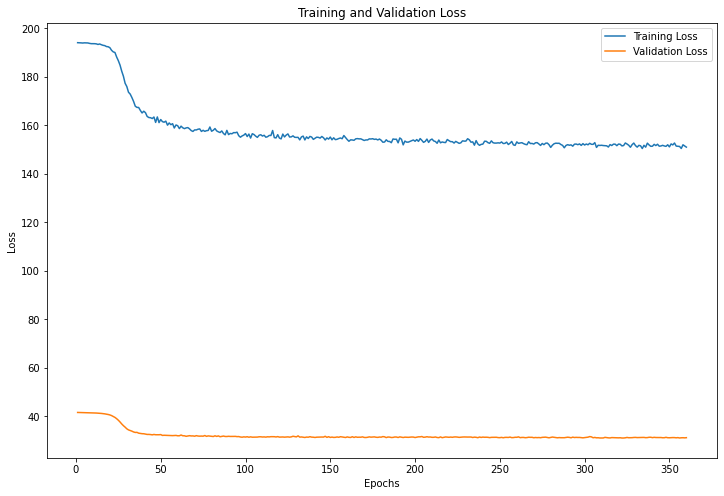


############ Acurácia ############
0.7773333333333333
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model1, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 2

### Modelo

In [ ]:
input_features = 3
output_size = 2
p = 0.5

model2 = GeradorRede(input_features , [Camada(200, nn.ReLU(), nn.Dropout(p) ),
                                      Camada(100, nn.ReLU(), nn.Dropout(p) ),
                                      Camada( 50, nn.ReLU(), nn.Dropout(p) ),
                                      Camada( 10, nn.ReLU()),
                                      Camada(  2, nn.Softmax(dim=-1) ),
                                      ])

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.01)

print(model2)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=200, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=100, out_features=50, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=50, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


### Treinamento

In [ ]:
epochs = 2000
batch_size = 25
early_stopping_epochs = 75 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento


runner = Classificador(df, model2, epochs, batch_size, early_stopping_epochs)
model2, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 29%|██▊       | 574/2000 [03:18<08:14,  2.89it/s]

Training interrupted by early stopping!
Total epochs run: 575
Best model found at epoch 499 with valid loss 31.02601608633995 and training loss 151.26354837417603
Total training time: 0:03:18.961552


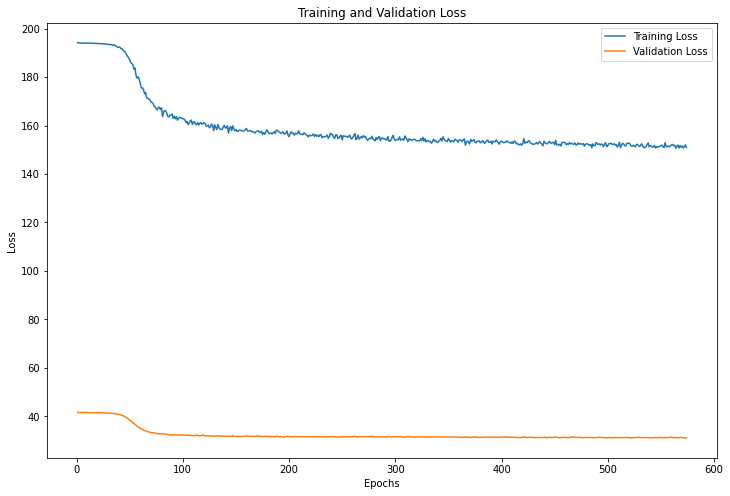


############ Acurácia ############
0.772
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model2, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 3

In [ ]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(300, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(100, nn.ReLU(), nn.Dropout(p * 0.5) ))
camadas.append(Camada( 50, nn.ReLU(), nn.Dropout(p * 0.25) ))
camadas.append(Camada( 10, nn.ReLU()))
camadas.append(Camada(  2, nn.Softmax(dim=-1) ))

model3 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.01)

print(model3)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=300, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Linear(in_features=100, out_features=50, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.125, inplace=False)
    (9): Linear(in_features=50, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [ ]:
epochs = 2000
batch_size = 30
early_stopping_epochs = 100 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model3, epochs, batch_size, early_stopping_epochs)
model3, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 20%|█▉        | 399/2000 [02:05<08:25,  3.17it/s]

Training interrupted by early stopping!
Total epochs run: 400
Best model found at epoch 299 with valid loss 25.940248280763626 and training loss 127.54991641640663
Total training time: 0:02:05.987630


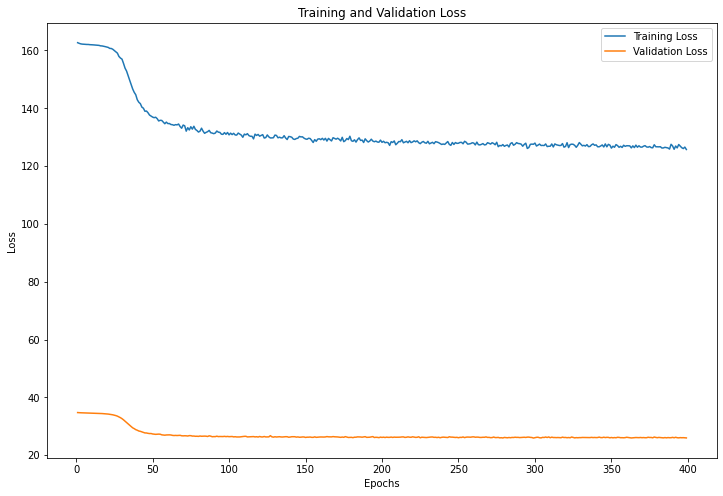


############ Acurácia ############
0.7693333333333333
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model3, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 4

In [ ]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(250, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(100, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 10, nn.ReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model4 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model4.parameters(), lr=0.01)

print(model4)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=100, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [ ]:
# model, train_loss, valid_loss = run_models(model, criterion, optimizer,
#                                            run_epochs = 3000,
#                                            run_batch_size = 65,
#                                            run_early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento
#                                            )

epochs = 3000
batch_size = 65
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model4, epochs, batch_size, early_stopping_epochs)
model4, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 18%|█▊        | 555/3000 [03:06<13:42,  2.97it/s]

Training interrupted by early stopping!
Total epochs run: 556
Best model found at epoch 485 with valid loss 12.584667384624481 and training loss 59.313852936029434
Total training time: 0:03:06.753072


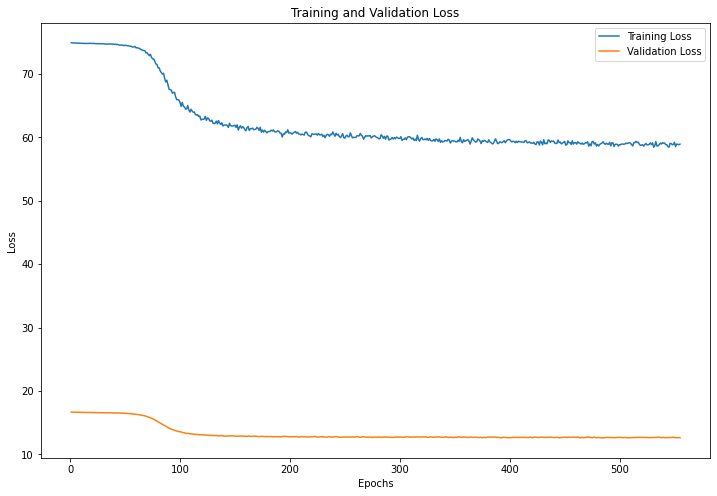


############ Acurácia ############
0.772
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model4, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 5

In [ ]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(250, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(100, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 10, nn.ReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model5 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model5.parameters(), lr=0.01)

print(model5)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=100, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [ ]:
# model, train_loss, valid_loss = run_models(model, criterion, optimizer,
#            run_epochs = 3000,
#            run_batch_size = 65,
#            run_early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento
#            )

epochs = 3000
batch_size = 65
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model5, epochs, batch_size, early_stopping_epochs)
model5, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 23%|██▎       | 688/3000 [03:52<13:00,  2.96it/s]

Training interrupted by early stopping!
Total epochs run: 689
Best model found at epoch 618 with valid loss 12.526647835969925 and training loss 58.44321206212044
Total training time: 0:03:52.140257


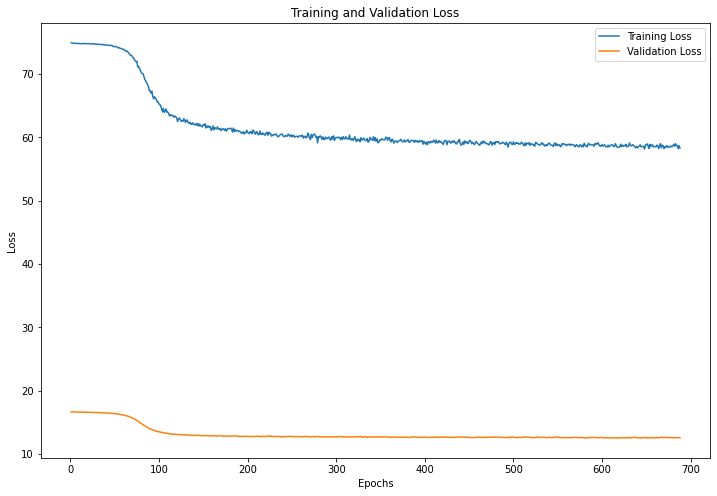


############ Acurácia ############
0.7706666666666667
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model5, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 6

In [ ]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(1000, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 250, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 100, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(  10, nn.ReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model6 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model6.parameters(), lr=0.01)

print(model6)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=1000, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1000, out_features=500, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=500, out_features=250, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=250, out_features=100, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=100, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=2, bias=True)
    (15): Softmax(dim=-1)
  )
)


In [ ]:
# model, train_loss, valid_loss = run_models(model6, criterion, optimizer,
#            run_epochs = 3000,
#            run_batch_size = 65,
#            run_early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento
#            )

epochs = 3000
batch_size = 65
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model6, epochs, batch_size, early_stopping_epochs)
model6, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 12%|█▏        | 369/3000 [05:49<41:30,  1.06it/s]

Training interrupted by early stopping!
Total epochs run: 370
Best model found at epoch 299 with valid loss 12.584645390510559 and training loss 59.26325908303261
Total training time: 0:05:49.309445


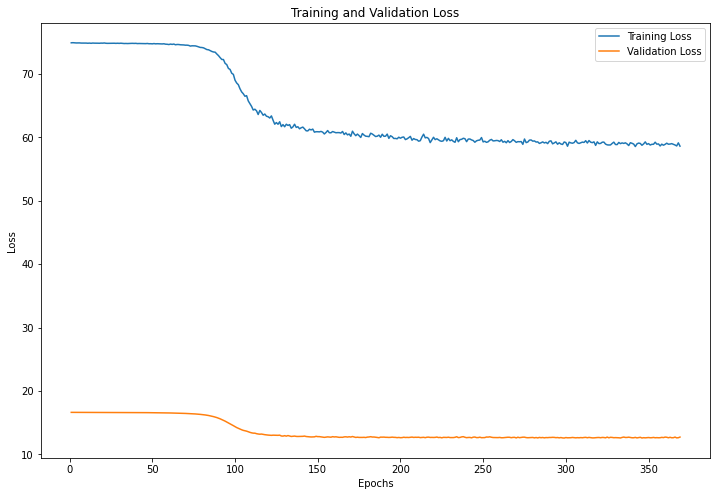


############ Acurácia ############
0.776
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model6, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 7

In [ ]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(1500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(1000, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 250, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 100, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(  10, nn.ReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model7 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model7.parameters(), lr=0.01)

print(model7)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=1500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1500, out_features=1000, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=1000, out_features=500, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=500, out_features=250, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=250, out_features=100, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.5, inplace=False)
    (15): Linear(in_features=100, out_features=10, bias=True)
    (16): ReLU()
    (17): Linear(in_features=10, out_features=2, bias=True)
    (18): Softmax(dim=-1)
  )
)


In [ ]:
# model, train_loss, valid_loss = run_models(model, criterion, optimizer,
#            run_epochs = 3000,
#            run_batch_size = 65,
#            run_early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento
#            )

epochs = 3000
batch_size = 65
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model7, epochs, batch_size, early_stopping_epochs)
model7, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 13%|█▎        | 392/3000 [18:16<2:01:32,  2.80s/it]

Training interrupted by early stopping!
Total epochs run: 393
Best model found at epoch 322 with valid loss 12.498706668615341 and training loss 59.18203777074814
Total training time: 0:18:16.056815


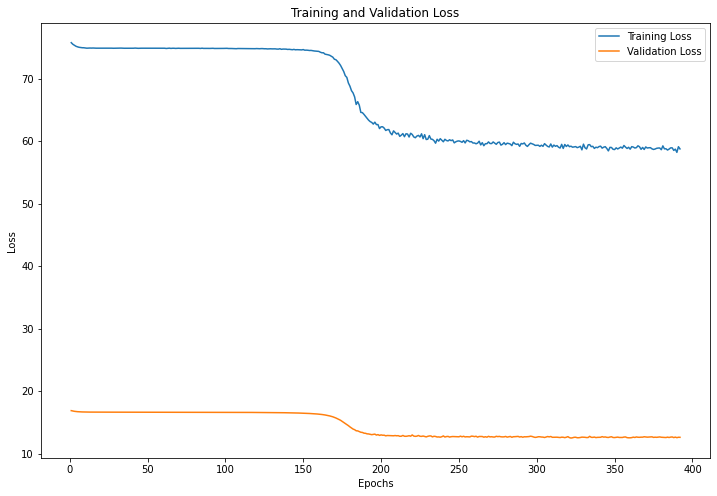


############ Acurácia ############
0.7766666666666666
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model7, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## Tentativa 8

In [ ]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(500, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(250, nn.ReLU(), nn.Dropout(p * 0.5) ))
camadas.append(Camada(100, nn.ReLU(), nn.Dropout(p * 0.25) ))
camadas.append(Camada( 10, nn.ReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model8 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model8.parameters(), lr=0.01)

print(model8)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=500, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=500, out_features=250, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Linear(in_features=250, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.125, inplace=False)
    (9): Linear(in_features=100, out_features=10, bias=True)
    (10): ReLU()
    (11): Linear(in_features=10, out_features=2, bias=True)
    (12): Softmax(dim=-1)
  )
)


In [ ]:
# model, train_loss, valid_loss = run_models(model, criterion, optimizer,
#            run_epochs = 3000,
#            run_batch_size = 65,
#            run_early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento
#            )

epochs = 3000
batch_size = 65
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model8, epochs, batch_size, early_stopping_epochs)
model8, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 14%|█▎        | 406/3000 [02:20<14:58,  2.89it/s]

Training interrupted by early stopping!
Total epochs run: 407
Best model found at epoch 336 with valid loss 12.610550373792648 and training loss 58.823680222034454
Total training time: 0:02:20.613464


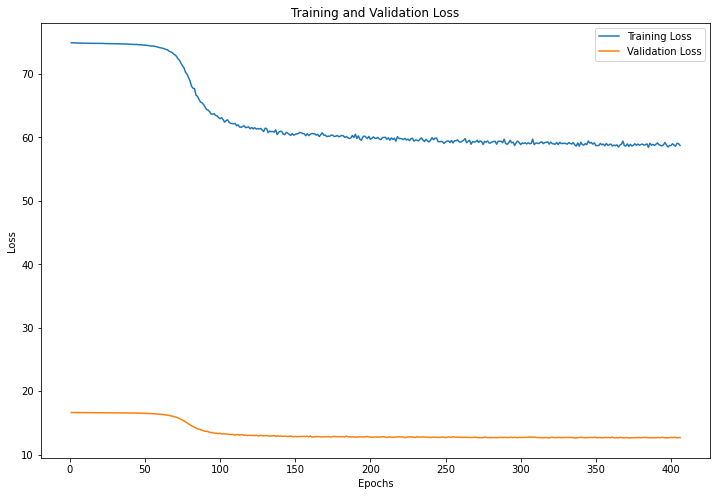


############ Acurácia ############
0.7706666666666667
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model8, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

# Novos Testes

In [ ]:
input_features = 3
output_size = 2
p = 0.4
camadas = []
camadas.append(Camada(128, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 64, nn.ReLU() ))
camadas.append(Camada( 32, nn.ReLU() ))
camadas.append(Camada( 16, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(output_size ))

model_1 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_1.parameters(), lr=0.001)

print(model_1)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.4, inplace=False)
    (10): Linear(in_features=16, out_features=2, bias=True)
  )
)


In [ ]:
epochs = 2000
batch_size = 20
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model_1, epochs, batch_size, early_stopping_epochs)
model_1, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 71%|███████▏  | 1427/2000 [08:45<03:30,  2.72it/s]

Training interrupted by early stopping!
Total epochs run: 1428
Best model found at epoch 1357 with valid loss 38.206590950489044 and training loss 189.98473235964775
Total training time: 0:08:45.227181


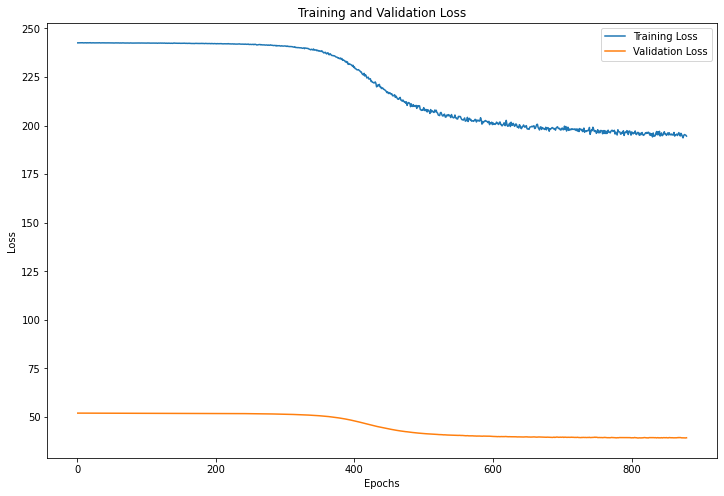


############ Acurácia ############
0.7693333333333333
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_1, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

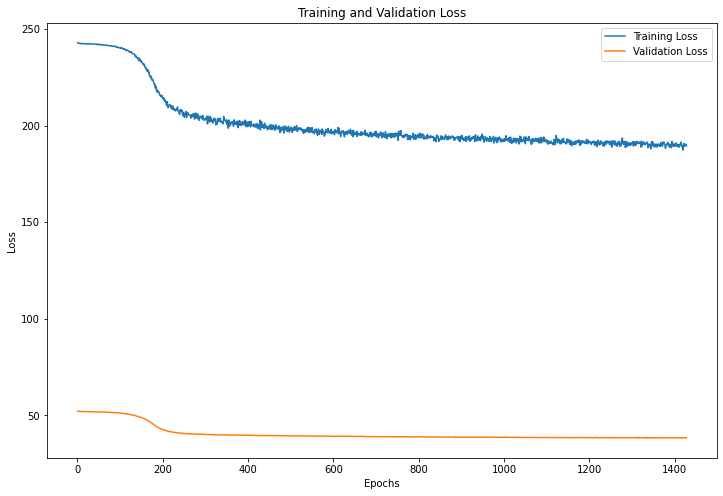


############ Acurácia ############
0.7666666666666667
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_1, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

# Otimizador diferente

## Adam

In [ ]:
input_features = 3
output_size = 2
p = 0.4
camadas = []
camadas.append(Camada(128, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 64, nn.ReLU() ))
camadas.append(Camada( 32, nn.ReLU() ))
camadas.append(Camada( 16, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model_2 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)


print(model_2)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.4, inplace=False)
    (10): Linear(in_features=16, out_features=2, bias=True)
    (11): Softmax(dim=-1)
  )
)


In [ ]:
epochs = 2000
batch_size = 20
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model_2, epochs, batch_size, early_stopping_epochs)
model_2, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 11%|█         | 223/2000 [02:28<19:43,  1.50it/s]

Training interrupted by early stopping!
Total epochs run: 224
Best model found at epoch 153 with valid loss 37.90564841032028 and training loss 183.08387622237206
Total training time: 0:02:28.545881


com a camada `nn.Softmax(dim=-1)`

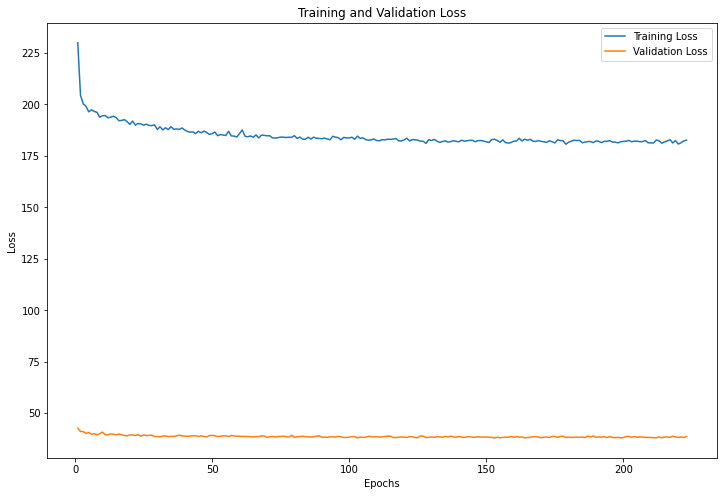


############ Acurácia ############
0.7693333333333333
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_1, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

sem a camada `nn.Softmax(dim=-1)`

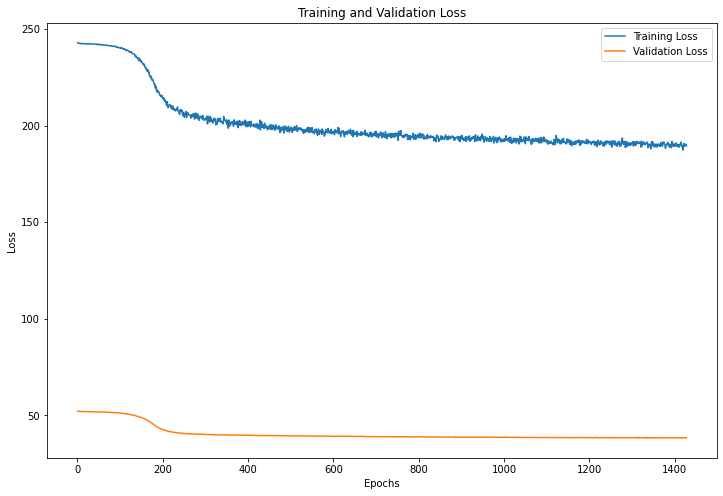


############ Acurácia ############
0.7666666666666667
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_1, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

Esses dois últimos gráficos se referem a tentativa do `model_1` com e sem a camada `nn.Softmax(dim=-1)`

## Adam com Weight Decay

In [ ]:
input_features = 3
output_size = 2
p = 0.4
camadas = []
camadas.append(Camada(128, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 64, nn.ReLU() ))
camadas.append(Camada( 32, nn.ReLU() ))
camadas.append(Camada( 16, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model_3 = GeradorRede(input_features , camadas)
print(model_3)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.4, inplace=False)
    (10): Linear(in_features=16, out_features=2, bias=True)
    (11): Softmax(dim=-1)
  )
)


In [ ]:
optimizer = optim.Adam(model_3.parameters(), lr=0.001, weight_decay=1e-7)

In [ ]:
epochs = 2000
batch_size = 20
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model_3, epochs, batch_size, early_stopping_epochs)
model_3, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

  8%|▊         | 157/2000 [01:49<21:19,  1.44it/s]

Training interrupted by early stopping!
Total epochs run: 158
Best model found at epoch 87 with valid loss 37.994867354631424 and training loss 183.68633502721786
Total training time: 0:01:49.037056


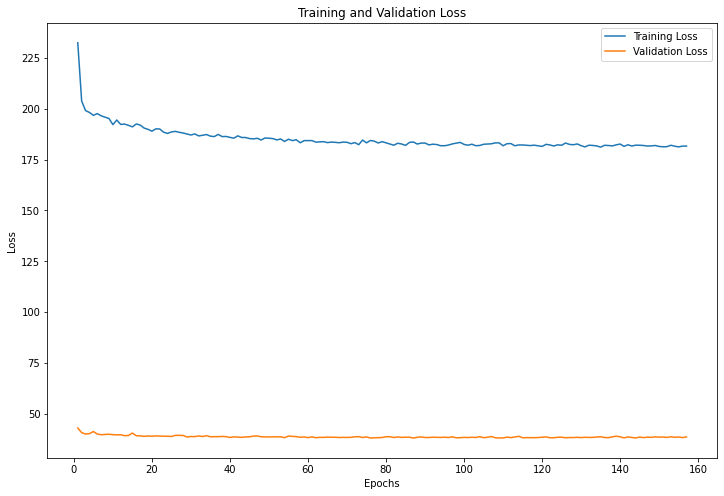


############ Acurácia ############
0.782
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_3, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

## RMSprop

In [ ]:
input_features = 3
output_size = 2
p = 0.4
camadas = []
camadas.append(Camada(128, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada( 64, nn.ReLU() ))
camadas.append(Camada( 32, nn.ReLU() ))
camadas.append(Camada( 16, nn.ReLU(), nn.Dropout(p) ))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model_4 = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()


print(model_4)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU()
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.4, inplace=False)
    (10): Linear(in_features=16, out_features=2, bias=True)
    (11): Softmax(dim=-1)
  )
)


In [ ]:
optimizer = optim.RMSprop(model_4.parameters(), lr=0.001)

In [ ]:
epochs = 2000
batch_size = 20
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model_4, epochs, batch_size, early_stopping_epochs)
model_4, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

 12%|█▏        | 249/2000 [02:18<16:16,  1.79it/s]

Training interrupted by early stopping!
Total epochs run: 250
Best model found at epoch 179 with valid loss 37.938321858644485 and training loss 181.27043372392654
Total training time: 0:02:18.844903


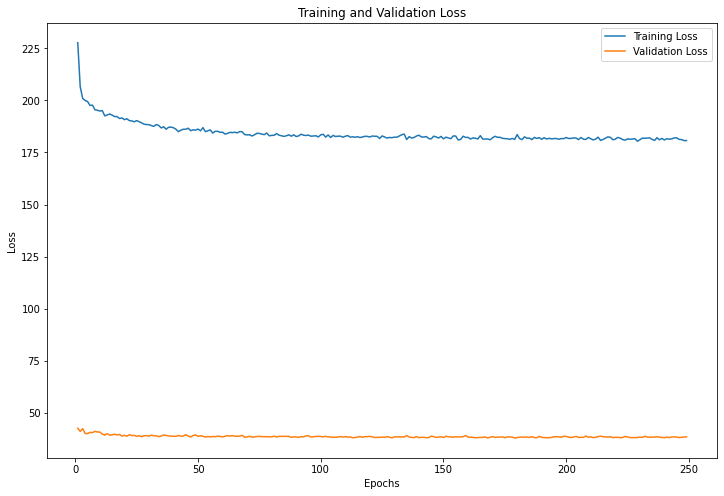


############ Acurácia ############
0.78
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_4, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))

# Teste Extra

In [8]:
input_features = 3
output_size = 2
p = 0.5
camadas = []
camadas.append(Camada(1500, nn.LeakyReLU(), nn.Dropout(p) ))
camadas.append(Camada(1000, nn.LeakyReLU(), nn.Dropout(p) ))
camadas.append(Camada( 500, nn.LeakyReLU(), nn.Dropout(p) ))
camadas.append(Camada( 250, nn.LeakyReLU(), nn.Dropout(p) ))
camadas.append(Camada( 100, nn.LeakyReLU(), nn.Dropout(p) ))
camadas.append(Camada(  10, nn.LeakyReLU()))
camadas.append(Camada(output_size, nn.Softmax(dim=-1) ))

model_better = GeradorRede(input_features , camadas)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_better.parameters(), lr=0.001, weight_decay=1e-7)

print(model_better)

GeradorRede(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=1500, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=1500, out_features=1000, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=1000, out_features=500, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Dropout(p=0.5, inplace=False)
    (9): Linear(in_features=500, out_features=250, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=250, out_features=100, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Dropout(p=0.5, inplace=False)
    (15): Linear(in_features=100, out_features=10, bias=True)
    (16): LeakyReLU(negative_slope=0.01)
    (17): Linear(in_features=10, out_features=2, bias=True)
    (18): Softmax(dim=-1)
  )
)


In [9]:
epochs = 3000
batch_size = 65
early_stopping_epochs = 70 # quantas épocas sem melhoria serão toleradas antes de parar o treinamento

runner = Classificador(df, model_better, epochs, batch_size, early_stopping_epochs)
model_better, train_loss, valid_loss, train, valid = runner.classificacao(optimizer, criterion)

  5%|▌         | 158/3000 [24:49<7:26:25,  9.43s/it]

Training interrupted by early stopping!
Total epochs run: 159
Best model found at epoch 88 with valid loss 12.447403907775879 and training loss 57.62748470902443
Total training time: 0:24:49.168662


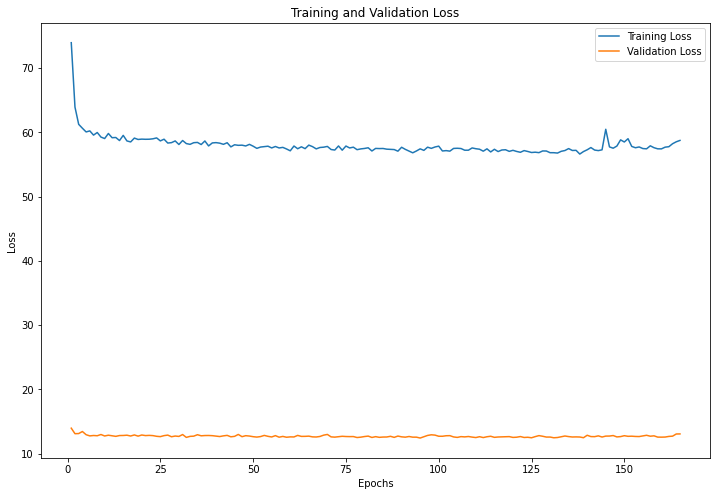


############ Acurácia ############
0.774
############ -------- ############


In [ ]:
X_train, X_test, y_train, y_test = train
X_valid, X_test, y_valid, y_test = valid

plots(model_better, train_loss, valid_loss, torch.from_numpy(X_test), torch.from_numpy(y_test.to_numpy()))